In [1]:
import tensorflow as tf
import os
import cv2
import pickle


In [14]:
d_dir = "data_faces2/train/drowsiness"
ud_dir = "data_faces2/train/undrowsiness"

d_img = os.listdir(d_dir)
ud_img = os.listdir(ud_dir)

print(d_img[10:20])
# print(ud_img[:10])

['10.mp4_103.jpg', '10.mp4_104.jpg', '10.mp4_105.jpg', '10.mp4_106.jpg', '10.mp4_107.jpg', '10.mp4_108.jpg', '10.mp4_109.jpg', '10.mp4_11.jpg', '10.mp4_110.jpg', '10.mp4_111.jpg']


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [18]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001) , loss = 'binary_crossentropy', metrics = ['accuracy'])

# model.compile(optimizer=RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics = ['accuracy'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = "data_faces2"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode = 'nearest')
test_datagen  = ImageDataGenerator( rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode = 'nearest')

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    shuffle = True,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         shuffle = True,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 1497 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [20]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=15,
                              verbose=1)

Epoch 1/15
75/75 [==============================] - 204s 3s/step - loss: 21.4289 - accuracy: 0.5271 - val_loss: 0.6807 - val_accuracy: 0.5398
Epoch 2/15
75/75 [==============================] - 195s 3s/step - loss: 1.0526 - accuracy: 0.5397 - val_loss: 0.7340 - val_accuracy: 0.5739
Epoch 3/15
75/75 [==============================] - 199s 3s/step - loss: 0.7625 - accuracy: 0.5524 - val_loss: 0.7002 - val_accuracy: 0.5455
Epoch 4/15
75/75 [==============================] - 199s 3s/step - loss: 0.6713 - accuracy: 0.5778 - val_loss: 0.6338 - val_accuracy: 0.6307
Epoch 5/15
75/75 [==============================] - 199s 3s/step - loss: 0.7760 - accuracy: 0.6420 - val_loss: 0.6711 - val_accuracy: 0.6023
Epoch 6/15
75/75 [==============================] - 199s 3s/step - loss: 0.6036 - accuracy: 0.6673 - val_loss: 0.5827 - val_accuracy: 0.6989
Epoch 7/15
75/75 [==============================] - 199s 3s/step - loss: 0.5915 - accuracy: 0.6754 - val_loss: 0.5878 - val_accuracy: 0.7273
Epoch 8/15
7

# Visualization Intermediate Representation

c:\users\se7en\anaconda3\envs\kaif\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


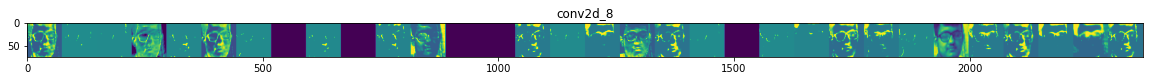

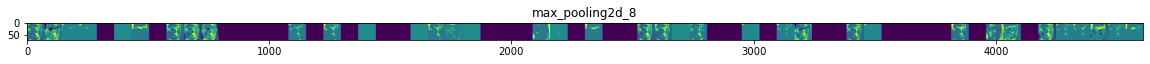

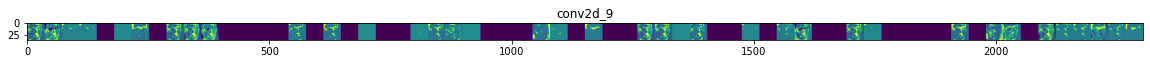

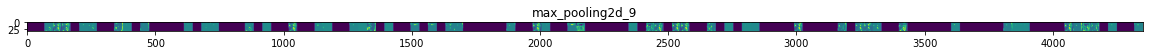

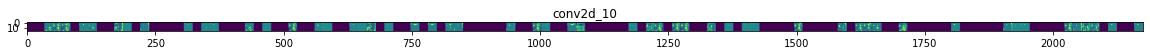

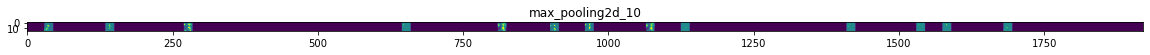

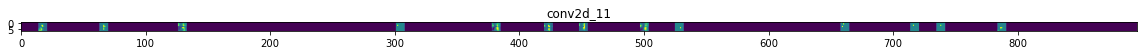

In [21]:
import matplotlib.pyplot as plt 
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
d_img_files = [os.path.join(d_dir, f) for f in d_img]
ud_img_files = [os.path.join(ud_dir, f) for f in ud_img]

img_path = random.choice(d_img_files + ud_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


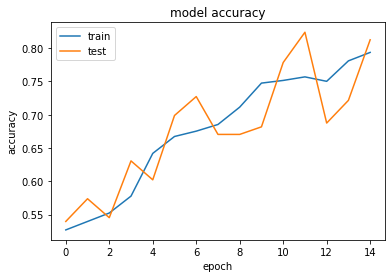

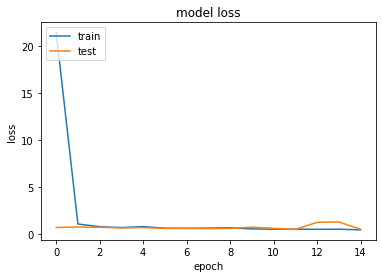

In [22]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model.save('model_1Nov_15epoch.h5')

In [24]:
import tensorflow as tf
import os
import cv2
import pickle
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('model_faces.h5')
face_cascade = cv2.CascadeClassifier("data/haarcascade_frontalface_alt.xml")
def prepare(path):
    size = 150
    img_array = cv2.imread(path)
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 7)
    for (x,y,w,h) in faces:
#         print(x,y,w,h)
        roi_image = img_array[y:y+h,x:x+w]
        
        roi_image = cv2.resize(roi_image, (size,size))
        print(roi_image.shape)
        return roi_image.reshape((1,150,150,3))
    img_array = cv2.resize(img_array , (size,size))
    return img_array.reshape((1,150,150,3))

(150, 150, 3)
(150, 150, 3)
undrowsiness


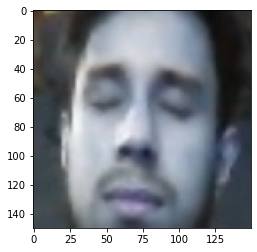

In [25]:
labels = ["drowsiness" , "undrowsiness"]
img_array = cv2.imread('vivek_drowsiness.mp4_337.jpg')
img_array = cv2.resize(img_array , (150,150))

print(img_array.shape)
pre = model.predict([prepare('vivek_drowsiness.mp4_337.jpg')])
print(labels[int(pre[0][0])])

plt.imshow(img_array , cmap = "gray")
plt.show()
# print(pre)

In [30]:
cap = cv2.VideoCapture(0)
label = "Test"
count = 0
size = 150
predict = 0
labels = ["drowsiness" , "undrowsiness"]
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 5)
    for (x,y,w,h) in faces:
#         print(x,y,w,h)
        roi_image = frame[y:y+h,x:x+w]
        roi_image = cv2.resize(roi_image , (size , size))
        pre = model.predict([roi_image.reshape(-1,150,150,3)])
        color = (0,45,255)
        stroke = 2
        end_x = x+w
        end_y = y+h
        
        cv2.rectangle(frame, (x,y), (end_x,end_y), color, stroke)
        label = labels[int(pre[0][0])]
        print(label,pre)
        if int(pre[0][0]):
            predict +=1
        else:
            predict -=1
        if count%5==0:
            if predict>=15:
                label = "undrowsiness"
            else:
                label = "drowsiness"
            predict = 0
        count+=1
            

    cv2.putText(frame,label, (5,450), cv2.FONT_HERSHEY_SIMPLEX, 2, (250,255,255))
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
drowsiness [[0.]]
drowsiness [[0.]]
drowsiness [[0.]]
drowsiness [[0.]]
drowsiness [[2.091451e-22]]
drowsiness [[0.]]
drowsiness [[3.0345177e-18]]
drowsiness [[0.]]
drowsiness [[0.]]
drowsiness [[0.]]
drowsiness [[0.819199]]
drowsiness [[7.72882e-15]]
drowsiness [[0.]]
drowsiness [[0.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
drowsiness [[0.5828655]]
drowsiness [[0.9999958]]
drowsiness [[1.6855944e-10]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
drowsiness [[1.3041459e-12]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undrowsiness [[1.]]
undr